# Regressão

- Aprendizado Supervisionado onde a variável alvo é contínua.
- Dado um conjunto de observações onde temos valores de features e valores para a variável target, como encontar um valor para a variável target dado uma nova observação?

# Boston hounsing data

In [1]:
import pandas as pd
boston = pd.read_csv('/Users/marcosdeoliveira/boston.csv')

In [2]:
print(boston.head())

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


## Criando arrays para features e target

In [3]:
X = boston.drop('MEDV', axis=1).values

In [4]:
y = boston['MEDV'].values

In [5]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Predizendo valor de uma residência usando apenas uma feature

In [7]:
X_rooms = X[:,5]

In [9]:
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [10]:
X_rooms

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [14]:
import numpy as np

In [15]:
help(np.reshape)

Help on function reshape in module numpy:

reshape(a, newshape, order='C')
    Gives a new shape to an array without changing its data.
    
    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is
        inferred from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the
        elements into the reshaped array using this index order.  'C'
        means to read / write the elements using C-like index order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest. 'F' means to read / write the
        elements using Fortran-like index order, with the first index
        c

In [16]:
y = y.reshape(-1, 1)

In [17]:
X_rooms = X_rooms.reshape(-1,1)

In [18]:
X_rooms

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [19]:
y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

## Plotando valor da residência vs. número de quartos

In [20]:
import matplotlib.pyplot as plt

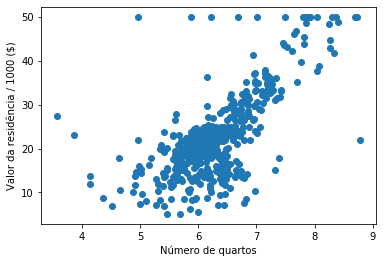

In [21]:
plt.scatter(X_rooms, y)
plt.ylabel('Valor da residência / 1000 ($)')
plt.xlabel('Número de quartos')
plt.show()

## Fitting um modelo de regressão

In [22]:
import numpy as np

In [23]:
from sklearn import linear_model

In [24]:
reg = linear_model.LinearRegression()

In [25]:
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
min(X_rooms)

array([3.561])

In [27]:
max(X_rooms)

array([8.78])

In [28]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

In [29]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

In [30]:
prediction_space

array([[3.561     ],
       [3.6675102 ],
       [3.77402041],
       [3.88053061],
       [3.98704082],
       [4.09355102],
       [4.20006122],
       [4.30657143],
       [4.41308163],
       [4.51959184],
       [4.62610204],
       [4.73261224],
       [4.83912245],
       [4.94563265],
       [5.05214286],
       [5.15865306],
       [5.26516327],
       [5.37167347],
       [5.47818367],
       [5.58469388],
       [5.69120408],
       [5.79771429],
       [5.90422449],
       [6.01073469],
       [6.1172449 ],
       [6.2237551 ],
       [6.33026531],
       [6.43677551],
       [6.54328571],
       [6.64979592],
       [6.75630612],
       [6.86281633],
       [6.96932653],
       [7.07583673],
       [7.18234694],
       [7.28885714],
       [7.39536735],
       [7.50187755],
       [7.60838776],
       [7.71489796],
       [7.82140816],
       [7.92791837],
       [8.03442857],
       [8.14093878],
       [8.24744898],
       [8.35395918],
       [8.46046939],
       [8.566

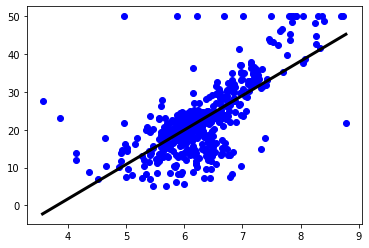

In [31]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

## Mecânica da Regressão

- y = ax + b
    - y = target
    - x = única feature
    - a, b = parâmetros do modelo
- Como escolher a e b?
- Definir uma função de erro para qualquer linha dada
    - Escolher a linha que minimiza a função de erro

# A função de perda (error function ou loss function)
- A linha deve ser o mais próximo dos pontos que representam os dados
- Devemos então minimizar a distância vertical dos dados para a linha
- Para cada datapoint é calculada a distância vertical para a linha (residual)
- poderia-se tentar minimizar a soma dos residuals mas um large positive cancelaria um large negative
- por essa razão é minimizado a soma dos residuals ao quadrado (essa é a loss function)
- Ordinary least squares (OLS): Minimiza a soma dos quadrados dos resíduos (o mesmo que minimizar o mean square error no conjunto de dados de teste)
- O método fit no modelo LinearRegression do scikitlearn implementa o OLS.

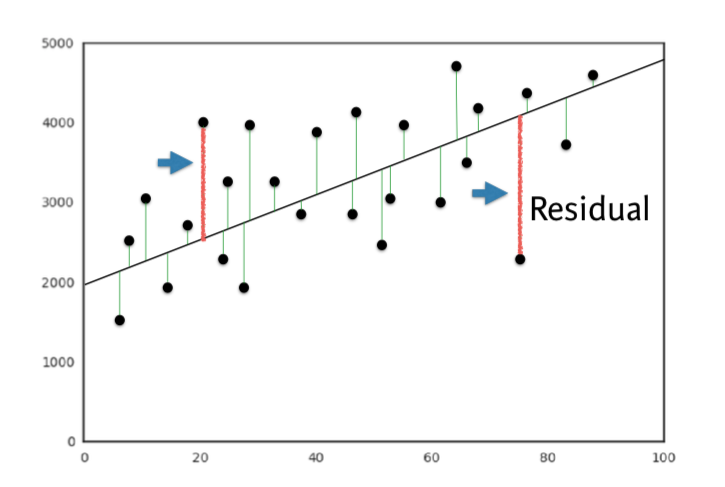

## Regressão Linear em dimenssões maiores
y = a1x1 + a2x2 + b
- Para ajustar(Fit) um modelo linear aqui:
    - É necessário especificar 3 variáveis
- Em dimenssões maiores:
    - y = a1x1 + a2x2 + a3x3 + anxn + b
    - Deve-se especificar o coeficiente para cada feature e a variável b
- Scikit-learn API trabalha exatamente dessa maneira:
    - Passe dois arrays: features e target

## Regressão Linear em todas as Features

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
reg_all = linear_model.LinearRegression()

In [35]:
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred = reg_all.predict(X_test)

In [37]:
reg_all.score(X_test, y_test)

0.7112260057484953

In [40]:
help(linear_model.score())

AttributeError: module 'sklearn.linear_model' has no attribute 'score'

- A métrica padrão para regressão linear é o Rˆ2 (Geralmente quanto maior, melhor o modelo está ajustado aos dados)
- Essa métrica cálcula a quantidade de variancia na variável target que é predizida usando as features.
ˆ

# Cross-validation

## Motivação
- A performance do modelo é dependente de como os dados são separados
- Capacidade do modelo de generalizar


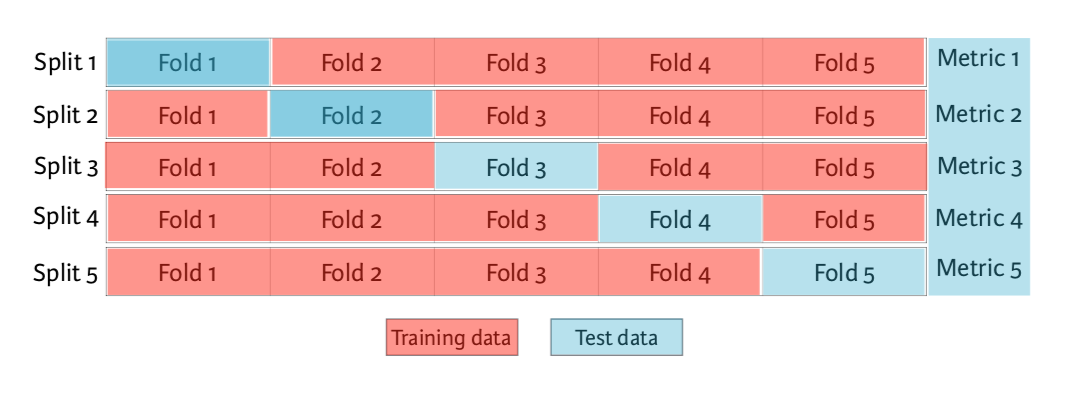

- 5 folds = 5-fold CV
- 10 folds = 10-fold CV
- k folds = k-fold CV
- Mais folds = Mais caro computacionalmente

## Cross-validation no scikit-learn

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
reg = linear_model.LinearRegression()

In [30]:
cv_results = cross_val_score(reg, X, y, cv=5)

In [31]:
print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [32]:
np.mean(cv_results)

0.3532759243958813

# Regressão Regularizada

- Lembre-se: Regressão Linar minimiza a função de perda
- Ela escolhe um coeficiente para cada feature
- Coeficientes muito grandes levam ao overfitting
- Penalizar coeficientes grandes = Regularização

# Ridge regression
- Loss function:
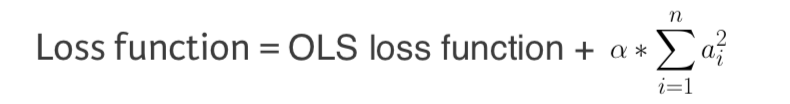

- Alpha: Parâmetro que precisamos escolher
- Escolher alpha aqui é similar a escolher k no k-NN
- Esse processo de escolha do alpha é chamado Hyperparameter tunning (mais a frente veremos mais)
- Alpha controla a complexidade do modelo
    - Aplphha = 0: obtemos de volta OLS e os coeficiente grandes não são penalizados (Pode levar a overfitting)
    - Alpha muito alto faz com que o modelo fique muito simples e pode levar a underfitting

# Ridge regression no scikit-learn

In [33]:
from sklearn.linear_model import Ridge

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
ridge = Ridge(alpha=0.1, normalize=True) # Normalizar garante que todas as variáveis estão na mesma escala 

In [36]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [37]:
ridge_pred = ridge.predict(X_test)

In [38]:
ridge.score(X_test, y_test)

0.6996938275127315

# Lasso Regression

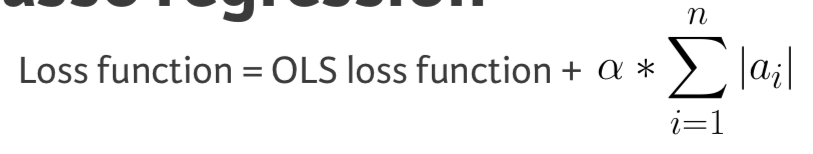

In [39]:
from sklearn.linear_model import Lasso

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
lasso = Lasso(alpha=0.1, normalize=True)

In [42]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [43]:
lasso_pred = lasso.predict(X_test)

In [44]:
lasso.score(X_test, y_test)

0.5950229535328551

# Lasso regression para escolha de features
- Pode ser utilizada para selecionar features importantes de um dataset
- encolhe os coeficientes de features menos importantes para exatamente 0

In [45]:
from sklearn.linear_model import Lasso

In [46]:
names = boston.drop('MEDV', axis=1).columns

In [47]:
lasso = Lasso(alpha=0.1, normalize=True)

In [48]:
lasso_coef = lasso.fit(X, y).coef_

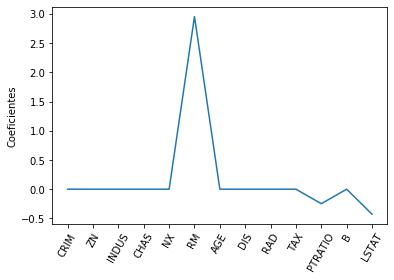

In [49]:
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coeficientes')
plt.show()

In [50]:
lasso_coef

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.95469455, -0.        ,  0.        , -0.        , -0.        ,
       -0.24795837,  0.        , -0.42817439])